[Reference](https://medium.com/mlearning-ai/getting-started-with-raincloud-plots-in-python-2ea5c2d01c11)

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Generate random distribution of integers between 0-10 as the first feature
x1 = np.random.choice([0,1,2,3,4,5,6,7,8,9,10], p=[0.01, 0.01, 0.15, 0.19, 0.05, 0.11, 0.2, 0.16, 0.10, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the x-axis in scatter plot
idxs = np.arange(len(x1))
out = x1.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x1 = out

# Generate random distribution of integers between 6-17 as the second feature
x2 = np.random.choice([6,7,8,9,10,11,12,13,14,15,16,17], p=[0.01, 0.01, 0.15, 0.23, 0.14, 0.06, 0.05, 0.10, 0.12, 0.11, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the y-axis in scatter plot
idxs = np.arange(len(x2))
out = x2.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x2 = out

# Combine features in a list
data_x = [x1, x2]

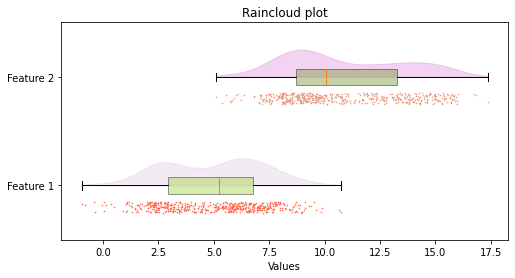

In [2]:
fig, ax = plt.subplots(figsize=(8, 4))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.title("Raincloud plot")
plt.show()